In [1]:
!pip install keras_tuner

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 128.9/128.9 kB 2.5 MB/s eta 0:00:00


In [2]:
import os
os.chdir('D:/Dataset/')

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('e_commerce.csv')
df

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,107,415,3717191,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,137,415,3581921,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,84,408,3759999,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,75,415,3306626,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,4144276,no,yes,36,156,27,18,77.0,216,126,279.1,83,12.56,9.9,6,2.67,2.0,0
3329,68,415,3703271,no,no,0,231,39,13,NaN,153,55,191.3,123,8.61,9.6,4,2.59,3.0,0
3330,28,510,3288230,no,no,0,181,31,25,109.0,289,58,191.9,91,8.64,14.1,6,3.81,2.0,0
3331,184,510,3646381,yes,no,0,214,36,14,105.0,160,84,139.2,137,6.26,5.0,10,1.35,2.0,0


# Eda

In [5]:
df.isna().sum()

account length                          0
location code                           0
user id                                 0
credit card info save                   0
push status                             0
add to wishlist                         0
desktop sessions                        0
app sessions                            0
desktop transactions                    0
total product detail views             52
session duration                        0
promotion clicks                        0
avg order value                         0
sale product views                      0
discount rate per visited products      0
product detail view per app session    61
app transactions                        0
add to cart per session                 0
customer service calls                 59
churn                                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3281 non-null   float64
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

# define x and y

In [7]:
x=df.drop(['churn'],axis=1)
y=df['churn']

# preprocessing

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [9]:
cat=[]
con=[]

for i in x.columns:
    if x[i].dtypes=='object':
        cat.append(i)
    else:
        con.append(i)

In [10]:
cat

['credit card info save', 'push status']

In [11]:
con

['account length',
 'location code',
 'user id',
 'add to wishlist',
 'desktop sessions',
 'app sessions',
 'desktop transactions',
 'total product detail views',
 'session duration',
 'promotion clicks',
 'avg order value',
 'sale product views',
 'discount rate per visited products',
 'product detail view per app session',
 'app transactions',
 'add to cart per session',
 'customer service calls']

In [12]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scalar',StandardScaler())])
cat_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),('encode',OrdinalEncoder())])

In [13]:
pre=ColumnTransformer([('cat_pipe',cat_pipe,cat),('con_pipe',num_pipe,con)])

In [14]:
x1=pd.DataFrame(pre.fit_transform(x),columns=pre.get_feature_names_out())
x1

,cat_pipe__credit card info save,cat_pipe__push status,con_pipe__account length,con_pipe__location code,con_pipe__user id,con_pipe__add to wishlist,con_pipe__desktop sessions,con_pipe__app sessions,con_pipe__desktop transactions,con_pipe__total product detail views,con_pipe__session duration,con_pipe__promotion clicks,con_pipe__avg order value,con_pipe__sale product views,con_pipe__discount rate per visited products,con_pipe__product detail view per app session,con_pipe__app transactions,con_pipe__add to cart per session,con_pipe__customer service calls
0,0.0,1.0,0.676489,-0.523603,0.285359,1.234883,1.564550,1.557193,-0.020265,0.474708,-0.079666,-0.658138,0.866743,-0.465494,0.866029,-0.088435,-0.601195,-0.085690,-0.421808
1,0.0,1.0,0.149065,-0.523603,-0.105965,1.307948,-0.327130,-0.384977,-0.020265,1.128760,-0.099387,0.145038,1.058571,0.147825,1.059390,1.248892,-0.601195,1.241169,-0.421808
2,0.0,0.0,0.902529,-0.523603,-0.598534,-0.591760,1.160502,1.125600,-1.639456,0.675955,-1.578480,0.496427,-0.756869,0.198935,-0.755571,0.706732,0.211534,0.697156,-1.187125
3,1.0,0.0,-0.428590,-0.688834,0.049915,-0.591760,2.188988,2.204583,-2.796021,-1.487447,-2.742033,-0.607939,-0.078551,-0.567714,-0.078806,-1.317330,1.024263,-1.306401,0.343509
4,1.0,0.0,-0.654629,-0.523603,-1.600987,-0.591760,-0.235301,-0.277078,-0.945517,0.625643,-1.046007,1.098809,-0.276311,1.067803,-0.276562,-0.052291,-0.601195,-0.045885,1.108826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.0,1.0,2.283878,-0.523603,1.449212,2.038605,-0.437325,-0.384977,0.211048,-1.185577,0.295038,1.299603,1.547039,-0.874374,1.547188,-0.124579,0.617898,-0.125496,0.343509
3329,0.0,0.0,-0.830437,-0.523603,-0.156653,-0.591760,0.940112,0.909803,-0.945517,0.021903,-0.947401,-2.264489,-0.189297,1.170023,-0.188670,-0.233011,-0.194831,-0.231645,1.108826
3330,0.0,0.0,-1.835055,1.718817,-1.667974,-0.591760,0.021821,0.046617,1.830239,0.424396,1.734688,-2.113894,-0.177431,-0.465494,-0.175486,1.393468,0.617898,1.387123,0.343509
3331,1.0,0.0,2.082955,1.718817,-0.363811,-0.591760,0.627893,0.586108,-0.714204,0.223150,-0.809352,-0.808733,-1.219628,1.885562,-1.221396,-1.895634,2.243356,-1.876950,0.343509


# Train Test Split


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=23)

# Keras Tuner


In [17]:
import keras_tuner as kt

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [19]:
def build_model(hp):
    nn=Sequential()
    
    u1=hp.Int('unit1',min_value=32,max_value=512,step=32)
    u2=hp.Int('unit2',min_value=32,max_value=512,step=32)
    
    nn.add(Dense(units=u1,input_dim=x_train.shape[1],activation='relu'))
    nn.add(Dense(units=u2,activation='relu'))
    
    nn.add(Dense(1,activation='sigmoid'))
    
    nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
    
    return nn

In [24]:
tuner=kt.Hyperband(build_model,
                  objective='val_loss',
                  max_epochs=5,
                  directory='tuner1',
                  project_name='tuner_demo')

Reloading Tuner from tuner1\tuner_demo\tuner0.json


In [25]:
tuner.search(x_train,y_train,epochs=20,validation_split=0.2)

In [26]:
tuner.get_best_hyperparameters()[0].get('unit1')

256

In [27]:
tuner.get_best_hyperparameters()[0].get('unit2')

256

# Model Building


In [28]:
nn=Sequential()

In [29]:
nn.add(Dense(480,input_dim=x_train.shape[1],activation='relu'))
nn.add(Dense(352,activation='relu'))

nn.add(Dense(1,activation='sigmoid'))

# Compile the Model


In [30]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# callbacks


In [31]:
from keras.callbacks import EarlyStopping
Early=EarlyStopping(monitor='val_loss',patience=5)

# Fiting The Model

In [32]:
hist=nn.fit(x_train,y_train,validation_split=0.2,callbacks=[Early],epochs=30)

Epoch 1/30
67/67 [==============================] - 2s 13ms/step - loss: 0.3683 - accuracy: 0.8701 - val_loss: 0.3036 - val_accuracy: 0.8989
Epoch 2/30
67/67 [==============================] - 1s 10ms/step - loss: 0.2740 - accuracy: 0.9034 - val_loss: 0.2788 - val_accuracy: 0.8933
Epoch 3/30
67/67 [==============================] - 1s 9ms/step - loss: 0.2458 - accuracy: 0.9118 - val_loss: 0.2506 - val_accuracy: 0.9120
Epoch 4/30
67/67 [==============================] - 1s 9ms/step - loss: 0.2202 - accuracy: 0.9235 - val_loss: 0.2491 - val_accuracy: 0.8989
Epoch 5/30
67/67 [==============================] - 1s 9ms/step - loss: 0.1987 - accuracy: 0.9348 - val_loss: 0.2409 - val_accuracy: 0.9232
Epoch 6/30
67/67 [==============================] - 1s 10ms/step - loss: 0.1845 - accuracy: 0.9428 - val_loss: 0.2497 - val_accuracy: 0.9176
Epoch 7/30
67/67 [==============================] - 1s 10ms/step - loss: 0.1720 - accuracy: 0.9447 - val_loss: 0.2375 - val_accuracy: 0.9176
Epoch 8/30
67/67

# Plot The result


In [33]:
import matplotlib.pyplot as plt

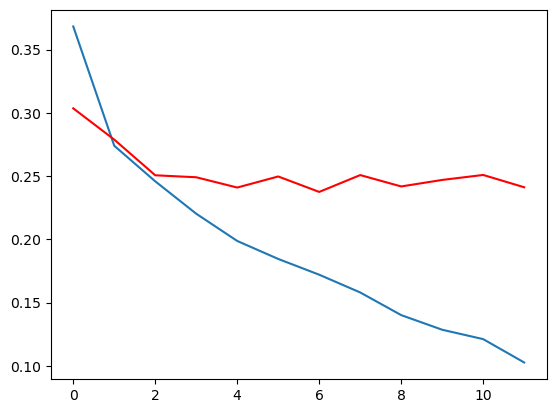

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],c='red')

# Prediction on Unseen Data


In [36]:
ts_pred=nn.predict(x_test)
ts_pred

21/21 [==============================] - 0s 5ms/step


array([[2.10652389e-02],
       [9.69683170e-01],
       [8.21391493e-03],
       [1.30070709e-02],
       [6.89701876e-03],
       [2.40328591e-02],
       [1.30841956e-01],
       [1.50887877e-01],
       [8.61639604e-02],
       [9.66430664e-01],
       [9.85490382e-01],
       [1.63135864e-03],
       [3.07462015e-03],
       [2.76665315e-02],
       [2.76795000e-01],
       [2.37729703e-03],
       [3.05807274e-02],
       [1.73741337e-02],
       [1.57692144e-03],
       [2.42254976e-03],
       [1.18560363e-02],
       [1.44567359e-02],
       [6.66958885e-03],
       [3.28140520e-02],
       [4.02312167e-03],
       [2.37181154e-03],
       [2.24887766e-02],
       [4.97286357e-02],
       [9.73374367e-01],
       [1.70043800e-02],
       [6.12494461e-02],
       [9.99172032e-01],
       [6.81410730e-02],
       [9.73784208e-01],
       [2.97771804e-02],
       [9.04570937e-01],
       [1.00496136e-01],
       [9.65139363e-03],
       [2.79641687e-03],
       [1.16772382e-04],


In [37]:
y_pred=[]

for i in ts_pred:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred

[0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [39]:
y_test

13      0
778     0
899     0
1449    0
1206    0
       ..
1005    0
2605    0
2361    0
1465    0
1493    1
Name: churn, Length: 667, dtype: int64

# Evaluation of Model


In [40]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [41]:
acc=accuracy_score(y_test,y_pred)
cnf=confusion_matrix(y_test,y_pred)
clf=classification_report(y_test,y_pred)

print('*'*50)
print('Confusion Matrix:\n',cnf)
print('*'*50)
print('Classification Report:\n',clf)
print('*'*50)
print('Accuracy:\n',acc)

**************************************************
Confusion Matrix:
 [[553  19]
 [ 28  67]]
**************************************************
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       572
           1       0.78      0.71      0.74        95

    accuracy                           0.93       667
   macro avg       0.87      0.84      0.85       667
weighted avg       0.93      0.93      0.93       667

**************************************************
Accuracy:
 0.9295352323838081
